# Tests

This notebook collects basic plotting tests. 

In future, this might be moved to a different directory / formalized as unit tests. 

## Imports

In [1]:
from hicdash.constants import * 
from hicdash.definitions import *
from hicdash.utilities import *
from hicdash.readers import *
from hicdash.plotters import *
from hicdash.generator import *

## Read a Sample

Provide **full** paths (relative paths don't work at the moment) to each of the Arima-SV Pipeline output files (replace the below with your own -- the example data is not included with this repository). This particular example is quite old, so doesn't have the greatest quality.

In [2]:
sample = read_sample(
    "EXAMPLE", 
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_inter_30.hic",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_v1.3_Arima_QC_deep.txt",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE.breaks.bedpe",
    )

## Hi-C Centered Matrix

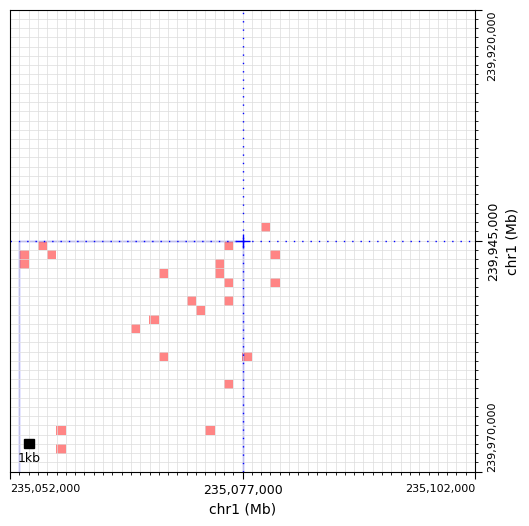

In [29]:
fig, ax = plt.subplots(figsize=(6,6))
call = sample.breakfinder_calls[0]
chrA, posA = call.breakpointA.chr, call.breakpointA.pos 
chrB, posB = call.breakpointB.chr, call.breakpointB.pos
resolution = call.resolution
width = 25 * resolution

regionX = Region(chrA, posA-width, posA+width)
regionY = Region(chrB, posB-width, posB+width)
ax = plot_hic_region_matrix(sample, regionX, regionY, resolution, ax=ax, grid_lines=True, crosshairs=True, minimal=False)


# ax = plot_hic_centered_matrix(sample, call.breakpointB.chr, call.breakpointB.pos, call.breakpointA.chr, call.breakpointA.pos, resolution, width, ax=ax, grid_lines=True)

# Get image data